In [ ]:
# cell-collective-basin-entropy.ipynb
#
# Bryan Daniels
# 2023/11/8
#
# Does basin entropy act as a "higher-order correction" to the expected 
# control kernel size in the cell collective networks?

# Load network data from 2019 sensitivity paper

In [44]:
import glob
import os
from toolbox.simplePickle import load
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
cell_collective_data_directory = '/Users/bdaniel6/ASUDropbox/Research/grn-survey/data/'

In [8]:
os.path.split(cell_collective_data_directory)

('/Users/bdaniel6/ASUDropbox/Research/grn-survey/data', '')

In [14]:
landscape_data = {}
for directory in glob.glob(cell_collective_data_directory+"/*"):
    name = os.path.split(directory)[-1]
    ls_file = directory+"/landscape.dat"
    if os.path.isfile(ls_file):
        print("Loading landscape data for {}".format(name))
        landscape_data[name] = load(ls_file)

Loading landscape data for Vegf_Pathway_Of_Drosophila_Signaling_Pathway
Loading landscape data for Cortical_Area_Development
Loading landscape data for B_Cell_Differentiation
Loading landscape data for BT474_Breast_Cell_Line_Short-term_ErbB_Network
Loading landscape data for HCC1954_Breast_Cell_Line_Short-term_ErbB_Network
Loading landscape data for Fanconi_Anemia_And_Checkpoint_Recovery
Loading landscape data for Body_Segmentation_In_Drosophila_2013
Loading landscape data for Oxidative_Stress_Pathway
Loading landscape data for Iron_Acquisition_And_Oxidative_Stress_Response_In_Aspergillus_Fumigatus
Loading landscape data for Lac_Operon
Loading landscape data for Cardiac_Development
Loading landscape data for Mammalian_Cell_Cycle
Loading landscape data for Budding_Yeast_Cell_Cycle_2009
Loading landscape data for Metabolic_Interactions_In_The_Gut_Microbiome
Loading landscape data for Mammalian_Cell_Cycle_2006
Loading landscape data for CD4+_T_Cell_Differentiation_And_Plasticity
Loading l

In [34]:
landscape_data['Cortical_Area_Development']

{'attractors': array([[ 3],
        [28]]),
 'basin entropy': 0.5435644431995964,
 'basins': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0]),
 'heights': array([2, 1, 2, 0, 4, 4, 3, 3, 3, 3, 3, 3, 1, 2, 3, 3, 2, 2, 2, 2, 4, 4,
        3, 3, 3, 3, 3, 3, 0, 2, 3, 3]),
 'recurrence times': array([2, 1, 2, 0, 4, 4, 3, 3, 3, 3, 3, 3, 1, 2, 3, 3, 2, 2, 2, 2, 4, 4,
        3, 3, 3, 3, 3, 3, 0, 2, 3, 3]),
 'in-degrees': array([14,  6,  0,  2,  0,  0,  0,  0,  4,  0,  0,  0,  2,  0,  0,  0,  2,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0])}

In [38]:
# standardize names and extract basin entropies
standard_name_list = []
basin_entropies_list = []
for name in landscape_data.keys():
    standard_name_list.append( name.replace('_',' ') )
    #print(name)
    if 'basin entropy' in landscape_data[name]: # some are 'basin entropy' and some b'basin entropy'...
        basin_entropies_list.append(landscape_data[name]['basin entropy'])
    else:
        basin_entropies_list.append(landscape_data[name][b'basin entropy'])
        
# make pandas series
basin_entropies = pd.Series(basin_entropies_list,index=standard_name_list)

# Load control kernel data from 2021 control kernel paper

In [20]:
control_kernel_data_file = '/Users/bdaniel6/ASUDropbox/Research/grn-survey/Writeups/control-kernel-2020/Nature Comm final revision Aug 2021/zenodo Aug 2021/20200820_control_kernel_supplemental_info.csv'

In [25]:
ck_data = pd.read_csv(control_kernel_data_file).set_index('name')

In [46]:
# combine with basin entropy data
ck_data['basin entropy'] = basin_entropies

# include expected average ck size and difference from expected
ck_data['expected mean control kernel size'] = np.log2(ck_data['number of attractors'])
ck_data['difference from expected mean control kernel size'] = \
    ck_data['expected mean control kernel size'] - ck_data['mean control kernel size']

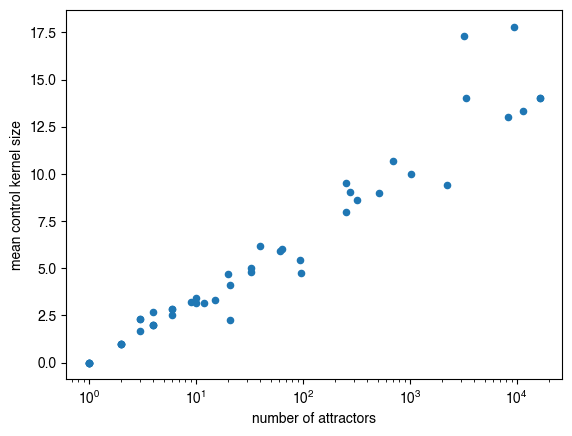

In [43]:
ck_data.plot.scatter('number of attractors','mean control kernel size')
plt.xscale('log')

(1.0, 20000.0, -0.4, 8.4)

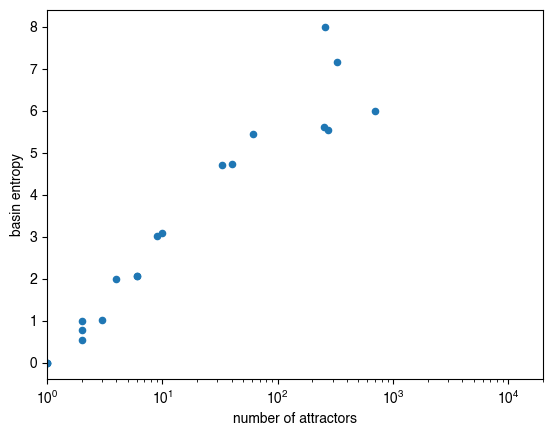

In [51]:
ck_data.plot.scatter('number of attractors','basin entropy')
plt.xscale('log')
plt.axis(xmin=1,xmax=2e4)

<Axes: xlabel='basin entropy', ylabel='difference from expected mean control kernel size'>

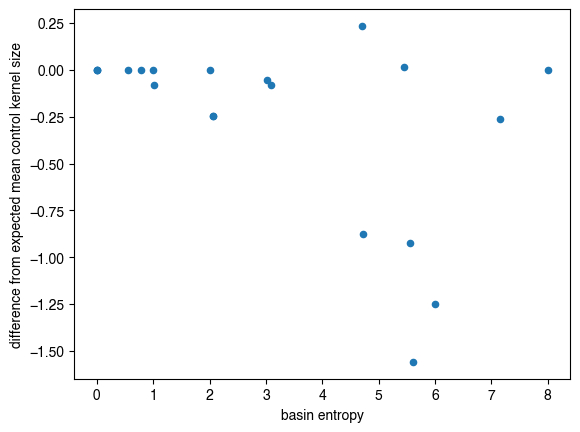

In [48]:
ck_data.plot.scatter('basin entropy','difference from expected mean control kernel size')